In [ ]:
%pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


# Group 5: NLP Ninjas
NLP Project

# 1. Explore the train dataset, choose a representative sample

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re
import gensim.downloader as api
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

In [ ]:
# Load the dataset
data = pd.read_csv('/content/data_nlp.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39942 entries, 0 to 39941
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    39942 non-null  int64 
 1   title    39942 non-null  object
 2   text     39942 non-null  object
 3   subject  39942 non-null  object
 4   date     39942 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
data.head()

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
print(data["label"].value_counts())


label
1    19999
0    19943
Name: count, dtype: int64


In [ ]:
# Choose a representative sample for experimentation
sample_data = data.sample(n=1000, random_state=42)

# 2. Build a classical NLP model

You have several choices here

How will you preprocess the data?

Think about choice between stemming or lemmatization

How many rare words should you remove?

Should you use n-grams?

Think what you want to do with different text fields?

Maybe you can begin with one and check what the accuracy is.

Think about the choice of classifier

SVM, Logisitic Regression or Multinomial Bayes could be a good choice. Do you remember why?



In [ ]:
# Download necessary NLTK resources
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Data preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  tokens = text.lower().split()  # Tokenization and lowercasing
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization and remove stopwords
  return ' '.join(tokens)

data['processed_text'] = data['text'].apply(preprocess_text)

In [ ]:
# Split the data into features and target
X = data['text']
y = data['label']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import joblib
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english',max_features=5000 ,ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
# Save the fitted vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
# Build and train the Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9887345099511828
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3996
           1       0.99      0.99      0.99      3993

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989



# 3. Build a Word2Vec-based classifier

You have 2 options with regards to embeddings:

You can create you own

You can take ready-to-use embeddings (you can finetune it too)

You have also a couple of options with regards to the model

Calculate average/max over the document vector and use any classical classifier

Use Conv1D Classifier or Kim's CNN architecture

Note that if you use this, you'll have to make all documents the same length (the same number of tokens). You can do it either by padding or by truncating

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Use the already preprocessed text column
sentences = data["processed_text"].dropna().apply(lambda x: x.split()).tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Function to convert text into vector by averaging word embeddings
def text_to_vector(words):
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

# Convert text data to numerical vectors
X = np.array([text_to_vector(words) for words in sentences])
y = data["label"].values  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train classifier (Random Forest)
Ranclf = RandomForestClassifier(n_estimators=100, random_state=42)
Ranclf.fit(X_train, y_train)

# Evaluate model
y_pred_rf = Ranclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Model Accuracy: 0.9532
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      3996
           1       0.96      0.95      0.95      3993

    accuracy                           0.95      7989
   macro avg       0.95      0.95      0.95      7989
weighted avg       0.95      0.95      0.95      7989



In [ ]:

# Use the already preprocessed text column
sentences = data["processed_text"].dropna().apply(lambda x: x.split()).tolist()

# Load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")  # Load GloVe embeddings

# Function to convert text into vector by averaging word embeddings
def text_to_vector(words):
    word_vectors = [glove_model[word] for word in words if word in glove_model]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

# Convert text data to numerical vectors
X = np.array([text_to_vector(words) for words in sentences])
y = data["label"].values  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train classifier (XGBClassifier)
xgclf = XGBClassifier(n_estimators=100, random_state=42)  # Create an instance of XGBClassifier
xgclf.fit(X_train, y_train)
# Evaluate model
y_pred_xgb = xgclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Model Accuracy: 0.9652
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      3996
           1       0.97      0.96      0.97      3993

    accuracy                           0.97      7989
   macro avg       0.97      0.97      0.97      7989
weighted avg       0.97      0.97      0.97      7989



In [ ]:
# Load the validation dataset
validation_data = pd.read_csv('/content/validation_data.csv')

In [ ]:
tfidf = joblib.load('tfidf_vectorizer.pkl')


In [ ]:
# Preprocess the validation data
validation_data['processed_text'] = validation_data['text'].apply(preprocess_text)

# Transform the preprocessed validation data using the same vectorizer
X_val_tfidf = tfidf.transform(validation_data['processed_text'])

In [ ]:
## Generate predictions for each model and save to separate CSV files
for model, name in zip([xgclf, Ranclf, clf], ["xgb", "rf", "lr"]):
    # Use the appropriate data for prediction based on the model
    if name == "xgb":
        # Convert validation data using the text_to_vector function

        sentences_val = validation_data["processed_text"].dropna().apply(lambda x: x.split()).tolist()
        X_val_for_xgb = np.array([text_to_vector(words) for words in sentences_val])
        y_pred_validation = model.predict(X_val_for_xgb)  # Predict using X_val_for_xgb
    elif name == "rf":
        # Convert validation data using text_to_vector for Ranclf
        sentences_val = validation_data["processed_text"].dropna().apply(lambda x: x.split()).tolist()
        X_val_for_rf = np.array([text_to_vector(words) for words in sentences_val])
        y_pred_validation = model.predict(X_val_for_rf)  # Predict using X_val_for_rf
    else:  # If using Logistic Regression
        y_pred_validation = model.predict(X_val_tfidf)  # Predict using TF-IDF data

    validation_data[f'label_{name}'] = y_pred_validation  # Create a new column for each model's predictions
    # Replace label 2 with model predictions
    validation_data[f'label_{name}'] = validation_data[f'label_{name}'].replace({2: 0})

    validation_data.to_csv(f"predicted_validation_data_{name}.csv", index=False)  # Save the validation data to a CSV file

    print(f"{name.upper()} Predictions saved successfully!")

XGB Predictions saved successfully!
RF Predictions saved successfully!
LR Predictions saved successfully!


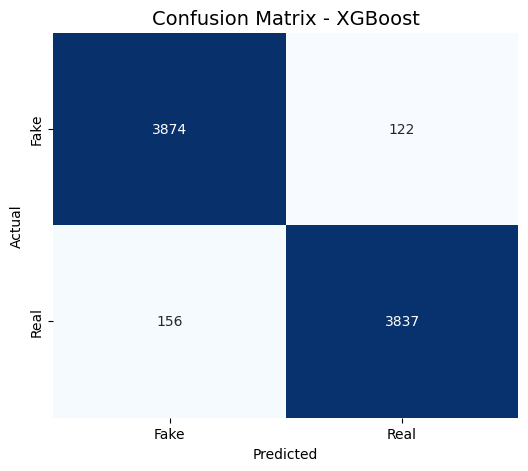

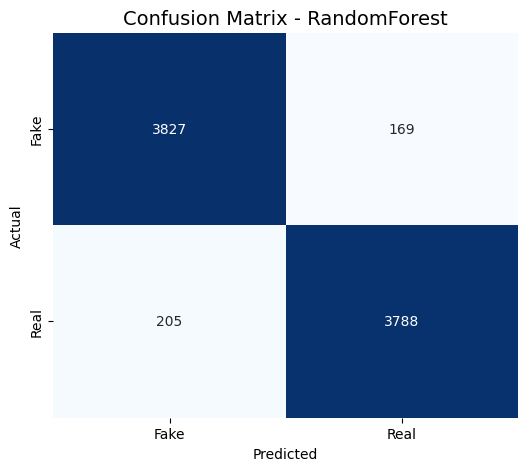

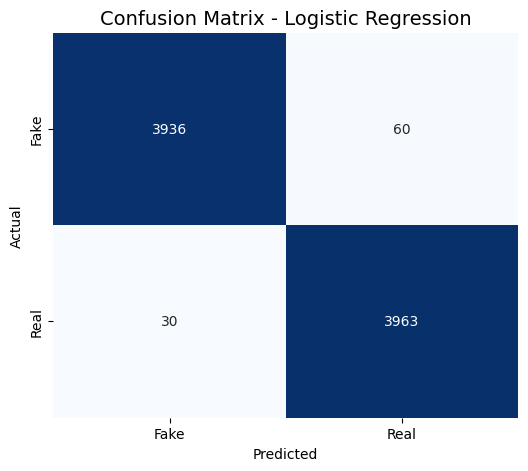

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
models = { "XGBoost": y_pred_xgb, "RandomForest": y_pred_rf, "Logistic Regression": y_pred}
for name, y_pred in models.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    plt.title(f"Confusion Matrix - {name}", fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Conv1D

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Preprocess text
texts = data["text"].astype(str).tolist()  # Convert to string
labels = data["label"].values  # Extract labels (already 0 or 1)

In [ ]:
# Tokenization
MAX_WORDS = 10000  # Vocabulary size
MAX_LEN = 200  # Fixed document length

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding="post", truncating="post")


In [ ]:
# Train-test split
train_X, test_X, train_y, test_y = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
# Build Conv1D Model
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    Conv1D(filters=64, kernel_size=5, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(32, activation="relu"),
    Dropout(0.5),  # Helps prevent overfitting
    Dense(1, activation="sigmoid")  # Binary classification
])


In [ ]:
# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Save best model during training
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1)

In [ ]:
# Train model
model.fit(train_X, train_y, epochs=5, batch_size=32, validation_data=(test_X, test_y), callbacks=[checkpoint])


Epoch 1/5
998/999 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9257 - loss: 0.1772
Epoch 1: val_accuracy improved from -inf to 0.99837, saving model to best_model.h5


999/999 ━━━━━━━━━━━━━━━━━━━━ 55s 53ms/step - accuracy: 0.9258 - loss: 0.1770 - val_accuracy: 0.9984 - val_loss: 0.0060
Epoch 2/5
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9989 - loss: 0.0069
Epoch 2: val_accuracy improved from 0.99837 to 0.99875, saving model to best_model.h5


999/999 ━━━━━━━━━━━━━━━━━━━━ 84s 55ms/step - accuracy: 0.9989 - loss: 0.0069 - val_accuracy: 0.9987 - val_loss: 0.0066
Epoch 3/5
998/999 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9995 - loss: 0.0041
Epoch 3: val_accuracy did not improve from 0.99875
999/999 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9995 - loss: 0.0041 - val_accuracy: 0.9986 - val_loss: 0.0102
Epoch 4/5
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 4: val_accuracy did not improve from 0.99875
999/999 ━━━━━━━━━━━━━━━━━━━━ 55s 55ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9986 - val_loss: 0.0104
Epoch 5/5
998/999 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 5: val_accuracy improved from 0.99875 to 0.99900, saving model to best_model.h5


999/999 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9990 - val_loss: 0.0086


In [ ]:
# Load the best model
best_model = tf.keras.models.load_model("best_model.h5")

# Evaluate best model
loss, acc = best_model.evaluate(test_X, test_y)
print(f"Best Model Test Accuracy: {acc:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9991 - loss: 0.0070
Best Model Test Accuracy: 0.9990


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       1.00      1.00      1.00      3993

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989



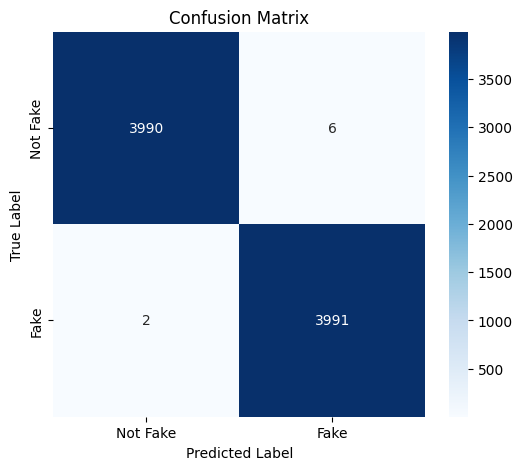

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the best saved model
best_model = tf.keras.models.load_model("best_model.h5")

# Make predictions on test data
predictions = best_model.predict(test_X)

# Convert probabilities to binary labels (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(test_y, binary_predictions)

# Print classification report (optional)
print("Classification Report:\n", classification_report(test_y, binary_predictions))

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fake", "Fake"], yticklabels=["Not Fake", "Fake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
